### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Practical activity solution: Sentiment analysis using Python

You are part of a data analytics team at Tumble Confectionery – a global chocolate company whose product line includes a range of chocolate products that feature unusual flavour combinations. The product manager is exploring how to expand the range. They need your help to research potential new flavours by gathering insights from social media. One of the ideas on the table is cheesecake-flavoured chocolate. 

Your manager asked you to start by analysing the sentiment towards cheesecake on Twitter. Therefore, you will begin by getting tweets about cheesecake straight from Twitter. You’ll need to use your Twitter developer account and use a Twitter API. Thereafter, you’ll analyse textual data from Twitter. You’ll look at some tweets about cheesecake straight from Twitter and apply natural language processing steps to comprehend the data at scale.

In this solution to the practical activity, you’ll pre-process and perform sentiment analysis on the extracted tweets. You’ll work with the NLTK Vader class to classify words into positive, neutral, or negative. The tweets will then be assigned a sentiment estimate. Therefore, you will:

- access the API in Python and query Twitter for key phrases
- customise the query and join results from the query in a Pandas DataFrame
- apply some pre-processing and perform sentiment analysis
- use the polarity score function and identify related words
- visualise the output to present to the business to help them decide on adding a flavour to their product line.


## 1. Prepare your workstation

In [1]:
# Install Twitter API.
!pip install twitter

     |████████████████████████████████| 50 kB 383 kB/s eta 0:00:01


In [3]:
# Copy the YAML file and your Twitter keys over to this Jupyter Notebook before you start to work
import yaml
from yaml.loader import SafeLoader
from twitter import *

# Import the yaml file - remember to specify the whole path and use / between directories
twitter_creds = yaml.safe_load(open('../twitter.yaml',
                                    'r').read())

ModuleNotFoundError: No module named 'twitter'

In [4]:
# Pass your twitter credentials
twitter_api = Twitter(auth=OAuth(twitter_creds['access_token'],
                                 twitter_creds['access_token_secret'],
                                 twitter_creds['api_key'],
                                 twitter_creds['api_secret_key'] ))

NameError: name 'Twitter' is not defined

In [5]:
# See if you are connected
print(twitter_api)

NameError: name 'twitter_api' is not defined

## 2. Query the term cheesecake

In [6]:
# Query the term cheesecake
q = {'q':'cheesecake', 'count':100, 'result_type':'recent'}
results = []

while len(results) < 30:
    query = twitter_api.search.tweets(**q)
    q['max_id'] = query['search_metadata']['next_results'].split('&')[0].split('?max_id=')[1]
    results.append(query)
    
# Determine the number of results
len(results) 

NameError: name 'twitter_api' is not defined

> **Note:** If you get an error message, re-run the code snippet after approximately five minutes.  

In [7]:


# This code snippet is for interest sake.
# Create a while loop to try and except query.
# while len(results) < 30:
#     query = twitter_api.search.tweets(**q)
#     try:
#         q['max_id'] = query['search_metadata']['next_results'].split('&')[0].split('?max_id=')[1]
#         results.append(query)
#     except:
#         break

In [8]:
# Import pandas to join the DataFrames
import pandas as pd

# Concat DataFrames
df = pd.concat([pd.DataFrame(_['statuses']) for _ in results])

# View shape of output
df.shape

ValueError: No objects to concatenate

In [ ]:
# Determine values of output.
df1 = df['text'].values

# View results.
df1

## 3. Pre-processing tweets

In [ ]:
# Import nltk and the required resources.
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words

nltk.download('stopwords')
nltk.download('words')
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

In [ ]:

# The results will change every time the code is executed. Let's review the first 15.

for i in range(15):
    print(i)
    print(df1[i])

In [9]:
# Look at one raw tweet
# Based on the results of the previous cell, select a tweet in English that contains keywords suitable for text analysis

# Set the index of the Tweet to be returned
tid = 5
df1[tid]

NameError: name 'df1' is not defined

In [10]:
# Split up each tweet into individual words
df2 = [word_tokenize(_) for _ in df1]

# View results.
df2

NameError: name 'df1' is not defined

In [11]:
# Get a list of all english words so we can exclude anything that doesnt appear on the list
all_english_words = set(words.words())

# View results.
all_english_words

NameError: name 'words' is not defined

In [12]:
# Some pre-processing:
#-- lets get every word
#-- lets convert it to lowercase
#-- only include if the word is alphanumeric and if it is in the list of English words.

df3 = [[y.lower() for y in x if y.lower() not in stop_words and y.isalpha() and y.lower() in all_english_words] for x in df2]

NameError: name 'df2' is not defined

In [13]:
# Let's have a look at the same tweet as above

df3[tid]

NameError: name 'df3' is not defined

## 4. Perform sentiment analysis

In [14]:
# import the prebuilt rules and values of the vader lexicon.
nltk.download('vader_lexicon')

NameError: name 'nltk' is not defined

In [15]:
# Import the vader classs and create a object of the analyzer called Darth Vader.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia.
sia = SentimentIntensityAnalyzer()

LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - '/Users/amnaqamar/nltk_data'
    - '/Users/amnaqamar/opt/anaconda3/nltk_data'
    - '/Users/amnaqamar/opt/anaconda3/share/nltk_data'
    - '/Users/amnaqamar/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [ ]:
# Run through a dictionary comprehension to take every cleaned tweet 
# Next run the polarity score function on the string.
# This will return four values in a dictionary

df_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df3}

In [37]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned tweet.
# We can see some of the highly positive words. 
polarity = pd.DataFrame(df_polarity).T

# View the DataFrame.
polarity

,neg,neu,pos,compound
brand new week brand new card brand new crazy week cupcake,0.194,0.806,0.000,-0.3400
keto blueberry cheesecake recipe keto challenge keto,0.000,0.822,0.178,0.0772
cheesecake,0.000,1.000,0.000,0.0000
,0.000,0.000,0.000,0.0000
casually looking like anyone,0.000,0.323,0.677,0.4939
...,...,...,...,...
making cheesecake one thing certain making soon dessert,0.000,0.769,0.231,0.2732
diet eating cheesecake goat,0.000,1.000,0.000,0.0000
going earnest cheesecake factory chain restaurant huge menu,0.000,0.517,0.483,0.6808
patisserie,0.000,1.000,0.000,0.0000


In [38]:
# With the non-aplhanumeric words (the emojis, handles, hashtags and stopwords) removed 
# some of the most positive words are single words

# Get the top 5 most positive cleaned tweets related to cheesecake
polarity.sort_values('pos', ascending=0).head(10)

,neg,neu,pos,compound
love,0.0,0.000,1.000,0.6369
yes,0.0,0.000,1.000,0.4019
lovely,0.0,0.000,1.000,0.5859
thank,0.0,0.000,1.000,0.3612
sweet,0.0,0.000,1.000,0.4588
love cheesecake yes awesome,0.0,0.083,0.917,0.9001
yes please like cheesecake,0.0,0.118,0.882,0.7579
alright accept cheesecake party,0.0,0.120,0.880,0.7430
love good cheesecake,0.0,0.123,0.877,0.7964
cheesecake win well,0.0,0.145,0.855,0.7096


In [39]:
# Get the top 5 most negative words related to cheesecake
polarity.sort_values('neg', ascending=0).head(10)

,neg,neu,pos,compound
trauma,1.000,0.000,0.0,-0.4215
struck,1.000,0.000,0.0,-0.2500
cheesecake terrorist,0.825,0.175,0.0,-0.6908
going hard cheesecake nasty ass,0.810,0.190,0.0,-0.8176
cheesecake disgusting worst dessert,0.789,0.211,0.0,-0.8176
cheesecake disgusting,0.773,0.227,0.0,-0.5267
spit cheesecake mad sickening,0.767,0.233,0.0,-0.7650
official cheesecake disgusting gross,0.765,0.235,0.0,-0.7579
cheesecake punishment,0.762,0.238,0.0,-0.4939
cheesecake gross,0.756,0.244,0.0,-0.4767


In [40]:
# The describe function on the compound will show the distribution and moments. 

polarity['compound'].describe()

count    1743.000000
mean        0.127991
std         0.335137
min        -0.895700
25%         0.000000
50%         0.000000
75%         0.401900
max         0.959500
Name: compound, dtype: float64

## 5. Visualise the results

<AxesSubplot:>

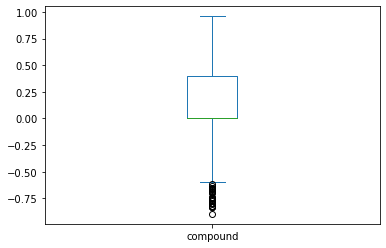

In [42]:
# Sometimes the best way to see is to plot. 
# In the data sampled here many of the values are 0
# There are less negative values than positive but the negative values are highly negative.

%matplotlib inline
import matplotlib.pyplot as plt

# The boxplot is a nice way to see how many values sit on the edges as outliers.
_plot = polarity.reset_index()['compound'].sort_values()
_plot.plot(kind='box')

## 6. Summarise findings

<AxesSubplot:>

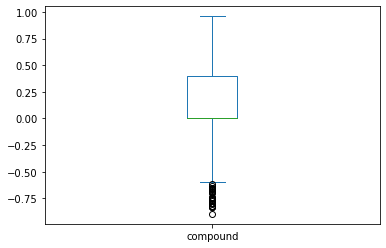

In [43]:
# Sometimes the best way to see is to plot. 
# In the data sampled here many of the values are 0

%matplotlib inline
import matplotlib.pyplot as plt

# The boxplot is a nice way to see how many values sit on the edges as outliers.
_plot = polarity.reset_index()['compound'].sort_values()
_plot.plot(kind='box')

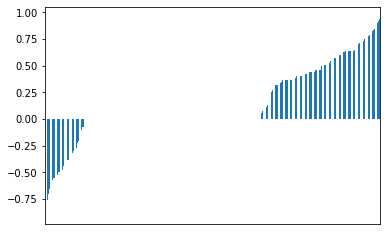

In [44]:
# Example of a barplot.
_plot = polarity.reset_index()['compound'].sort_values()
ax1 = plt.axes()
_plot.plot(kind='bar')

x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

plt.show()
plt.close()

array([[<AxesSubplot:title={'center':'compound'}>]], dtype=object)

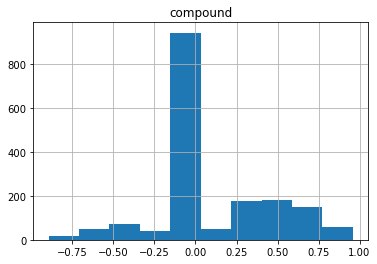

In [45]:
# You can also try to create a histogram:
polarity['compound'].sort_values().reset_index().hist()